In [129]:
import os
c = os.getcwd()
os.chdir("../")
from dynamics import *
from Consensus import *
from graph_utils import *
os.chdir(c)

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def get_net(Q):
    G = nx.Graph()

    for i in range(0,N):
        for j in range(0,N):
            if (np.linalg.norm(Q[i,:]-Q[j,:])<r):
                if(not G.has_edge(i,j)):
                    G.add_edge(i,j)
    return(G)

def rho_h(z,h=0.2):
    if (0 <= z and z < h):
        return 1
    if (h <= z and z <= 1):
        return (1/2)*(1+np.cos(np.pi*(z-h)/(1-h)))
    else:
        return 0
    
def sigma_norm(z,epsilon=0.1):
    return (1/epsilon)*(np.sqrt(1+epsilon*(np.linalg.norm(z))**2)-1)

def sigma_1(z):
    return z/(np.sqrt(1+z**2))

def phi(z,a=5,b=5):
    c = np.abs(a-b)/(np.sqrt(4*a*b))
    return (1/2)*((a+b)*sigma_1(z+c)+(a-b))

def phi_alpha(z,d,r):
    r_alpha = sigma_norm(r)
    d_alpha = sigma_norm(d)
    return rho_h(z/r_alpha)*phi(z-d_alpha)

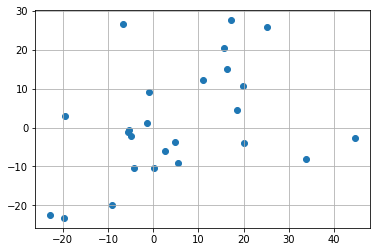

In [96]:
N=25
d=7
r=1.2*d
h=0.2
Q = np.sqrt(250)*np.random.randn(N,2)+0
plt.scatter(Q[:,0],Q[:,1])
plt.grid()

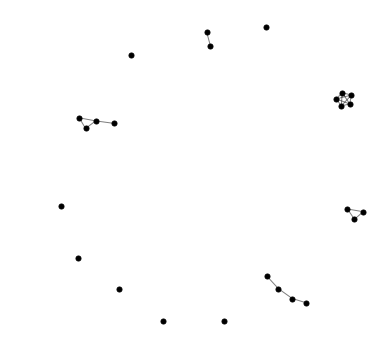

In [92]:
G = get_net(Q)
p=draw_graph(G,node_size=25,fig_size=6)

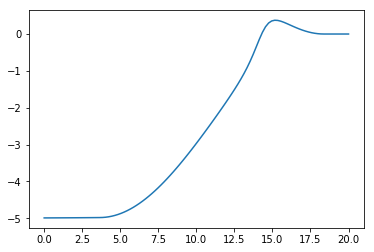

In [130]:
z = np.linspace(0,20,100)
y = np.zeros(len(z))
for i in range(0,len(y)):
    y[i] = phi_alpha(z[i],d,r)
    
plt.plot(z,y)